In [1]:
import pandas as pd
from sklearn import svm
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import metrics 

df = pd.read_csv('./train_motion_data.csv')
df2 = pd.read_csv('./test_motion_data.csv')

In [2]:
#sns.pairplot(df, hue="Class")

In [3]:
#sns.pairplot(df2, hue="Class")

In [4]:
df['Class2'] = df['Class']
df= df.replace({"Class2":  {"SLOW":1, "NORMAL":2, "AGGRESSIVE":3} })
df =df[df.Class != "SLOW"]
df2= df2.replace({"Class2":  {"SLOW":1, "NORMAL":2, "AGGRESSIVE":3} })

,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,Class,Timestamp,Class2
0,0.000000,0.000000,0.000000,0.059407,-0.174707,0.101938,NORMAL,3581629,2
1,-1.624864,-1.082492,-0.204183,-0.028558,0.051313,0.135536,NORMAL,3581630,2
2,-0.594660,-0.122410,0.220502,-0.019395,-0.029322,0.087888,NORMAL,3581630,2
3,0.738478,-0.228456,0.667732,0.069791,-0.029932,0.054902,NORMAL,3581631,2
4,0.101741,0.777568,-0.066730,0.030696,-0.003665,0.054902,NORMAL,3581631,2
...,...,...,...,...,...,...,...,...,...
2308,0.538870,-1.645984,-0.712197,0.349568,0.028100,0.662712,AGGRESSIVE,3582964,3
2309,1.678918,-1.392127,-0.476326,0.570090,-0.061697,-0.168675,AGGRESSIVE,3582965,3
2310,0.323433,0.589311,-1.939797,-0.027947,1.255328,0.639500,AGGRESSIVE,3582965,3
2311,2.497311,-0.606175,4.700154,0.849255,-0.196699,-0.240757,AGGRESSIVE,3582966,3


In [5]:
dfS = df[df.Class2!=3]
dfS = dfS[ df.Class2!=2]

dfN = df[df.Class2!=3]
dfN = dfN[ df.Class2!=1]

dfA = df[df.Class2!=1]
dfA = dfA[ df.Class2!=2]

/tmp/ipykernel_23629/1047416605.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfS = dfS[ df.Class2!=2]
/tmp/ipykernel_23629/1047416605.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfN = dfN[ df.Class2!=1]


In [6]:
dfall = [dfN,dfA,dfS]

In [7]:
def deleteAccY(d):
    Q1v = np.percentile(d['AccY'], 20)
    Q3v = np.percentile(d['AccY'], 80)
    IQRv = Q3v - Q1v
    Ls = Q3v + 1.5*IQRv
    Li = Q1v - 1.5*IQRv
    lsuperior = d[d['AccY'] > Ls]
    linferior = d[d['AccY'] < Li]
    d.drop(lsuperior.index, inplace=True)
    d.drop(linferior.index, inplace=True)

In [8]:
#deleteAccY(dfN)
#deleteAccY(dfS)

In [9]:
dfRes = pd.concat(dfall)

In [10]:
#df = dfRes


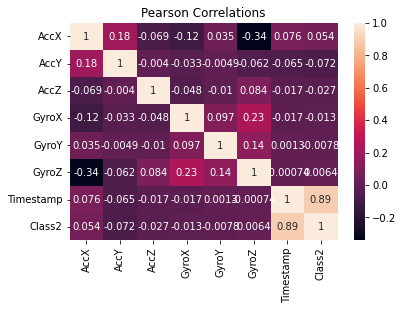

In [11]:
ax = sns.heatmap(df.corr(), annot=True).set(title='Pearson Correlations');

In [12]:
#sns.pairplot(df, hue="Class")

In [13]:
y=df["Class"].values
y1=df2["Class"].values
X_train =df[["AccX","AccY","GyroX"]].values
X_test = df2[["AccX","AccY","GyroX"]].values
y_train = y
y_test = y1

In [14]:

# Importing the library
import pandas as pd
from sklearn.preprocessing import StandardScaler
# define standard scaler
scaler = StandardScaler()
  
# transform data
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.fit_transform(X_test)


# Regresion

In [15]:
# Import sklearn linear_model
from sklearn.linear_model import LogisticRegression
regmodel = LogisticRegression()
#Train the model using the training sets


In [16]:
regmodel.fit(X_train, y_train)
y_pred = regmodel.predict(X_test)
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))

ACCURACY OF THE MODEL:  0.5687465488680287


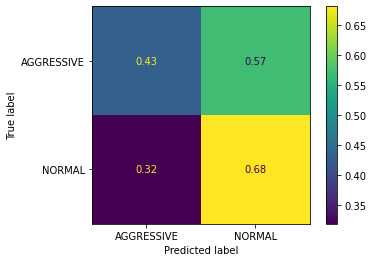

In [17]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
CMnorm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=CMnorm, display_labels=regmodel.classes_)
disp.plot()

# KNN

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
k = 50
kNN    = KNeighborsClassifier(n_neighbors=k,p=2)
kNN.fit(X_train, y_train)
kNN.score(X_test, y_test)
y_pred = kNN.predict(X_test)
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))

ACCURACY OF THE MODEL:  0.5919381557150746


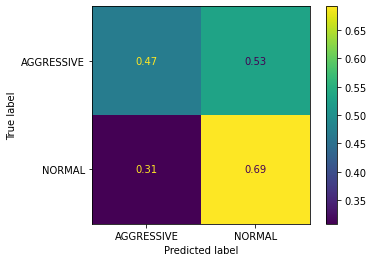

In [19]:
CMnorm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=CMnorm, display_labels=kNN.classes_)
disp.plot()

# RF

In [32]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators = 100) 
 
clf.fit(X_train, y_train)
 
y_pred = clf.predict(X_test)
 
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))

ACCURACY OF THE MODEL:  0.5687465488680287


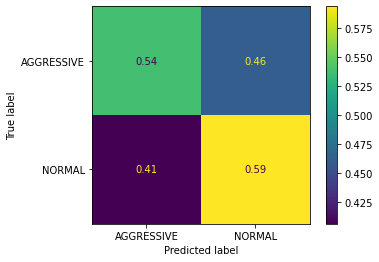

In [33]:
CMnorm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=CMnorm, display_labels=clf.classes_)
disp.plot()